In [25]:
# library imports
import pandas as pd
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC, SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, f1_score, recall_score

In [26]:
#making of data frame using the csv file
df = pd.read_csv("review_data.csv")
df.head()

,professor_name,school_name,department_name,local_name,state_name,year_since_first_review,star_rating,take_again,diff_index,tag_professor,...,lots_of_homework,accessible_outside_class,lecture_heavy,extra_credit,graded_by_few_things,group_projects,test_heavy,so_many_papers,beware_of_pop_quizzes,IsCourseOnline
0,Leslie Looney,University Of Illinois at Urbana-Champaign,Astronomy department,Champaign\xe2\x80\x93Urbana,IL,11.0,4.7,NaN,2.0,Hilarious (2) GROUP PROJECTS (2) Gives good ...,...,0,0,0,0,0,1,0,0,0,0
1,Leslie Looney,University Of Illinois at Urbana-Champaign,Astronomy department,Champaign\xe2\x80\x93Urbana,IL,11.0,4.7,NaN,2.0,Hilarious (2) GROUP PROJECTS (2) Gives good ...,...,0,0,0,0,0,1,0,0,0,0
2,Leslie Looney,University Of Illinois at Urbana-Champaign,Astronomy department,Champaign\xe2\x80\x93Urbana,IL,11.0,4.7,NaN,2.0,Hilarious (2) GROUP PROJECTS (2) Gives good ...,...,0,0,0,0,0,1,0,0,0,0
3,Leslie Looney,University Of Illinois at Urbana-Champaign,Astronomy department,Champaign\xe2\x80\x93Urbana,IL,11.0,4.7,NaN,2.0,Hilarious (2) GROUP PROJECTS (2) Gives good ...,...,0,0,0,0,0,1,0,0,0,0
4,Leslie Looney,University Of Illinois at Urbana-Champaign,Astronomy department,Champaign\xe2\x80\x93Urbana,IL,11.0,4.7,NaN,2.0,Hilarious (2) GROUP PROJECTS (2) Gives good ...,...,0,0,0,0,0,1,0,0,0,0


In [27]:
#extracting the relevant data from the dataframe
data = df[['comments', 'star_rating']]
data.head()

,comments,star_rating
0,"This class is hard, but its a two-in-one gen-e...",4.7
1,Definitely going to choose Prof. Looney\'s cla...,4.7
2,I overall enjoyed this class because the assig...,4.7
3,"Yes, it\'s possible to get an A but you\'ll de...",4.7
4,Professor Looney has great knowledge in Astron...,4.7


In [28]:
#star ratings binnning and assigning lable values
labels = ['bad', 'average', 'good']
num_bins = 3
data['rating_category'] = pd.cut(data['star_rating'], bins=num_bins, labels=labels, include_lowest=True)
data = data[['comments', 'rating_category']]
data.head()

/var/folders/k8/3fx6qljj0zv9983x2nyls1nh0000gn/T/ipykernel_2508/1711146745.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['rating_category'] = pd.cut(data['star_rating'], bins=num_bins, labels=labels, include_lowest=True)


,comments,rating_category
0,"This class is hard, but its a two-in-one gen-e...",good
1,Definitely going to choose Prof. Looney\'s cla...,good
2,I overall enjoyed this class because the assig...,good
3,"Yes, it\'s possible to get an A but you\'ll de...",good
4,Professor Looney has great knowledge in Astron...,good


<AxesSubplot: xlabel='rating_category', ylabel='count'>

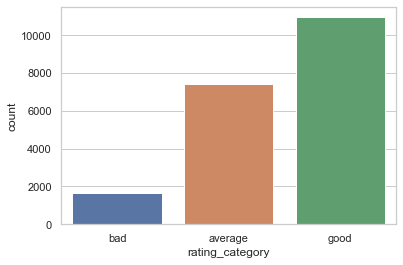

In [29]:
sns.set_theme(style="whitegrid")
sns.countplot(x=data["rating_category"])

In [30]:
#remove functuatuation marks from the comments data
data['comments'] = data['comments'].str.replace(r'[^\w\s]', '', regex=True)


In [31]:
data['comments'] = data['comments'].astype(str)['comments'] = data['comments'].str.lower()

In [32]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/madhushanihewagama/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
data['comments'] = data['comments'].astype(str).apply(lambda x: ' '.join(word for word in x.split() if word.lower() not in stop_words))

In [34]:
data.head()

,comments,rating_category
0,class hard twoinone gened knockout content sti...,good
1,definitely going choose prof looneys class int...,good
2,overall enjoyed class assignments straightforw...,good
3,yes possible get youll definitely work content...,good
4,professor looney great knowledge astronomy exp...,good


In [35]:
x_train, x_test, y_train, y_test = train_test_split(data["comments"],data["rating_category"], test_size = 0.25, random_state = 42)    
count_vect = CountVectorizer(ngram_range=(1, 2))        
transformer = TfidfTransformer(norm='l2',sublinear_tf=True)
x_train_counts = count_vect.fit_transform(x_train)
x_train_tfidf = transformer.fit_transform(x_train_counts)

x_test_counts = count_vect.transform(x_test)
x_test_tfidf = transformer.transform(x_test_counts)

print (x_train_tfidf.shape,x_test_tfidf.shape, y_train.shape, y_test.shape)

(15000, 165127) (5000, 165127) (15000,) (5000,)


# Save CountVectorizer model as pickle file

In [51]:
import pickle
with open('counterVectorizer_pkl', 'wb') as files:
    pickle.dump(count_vect, files)

In [36]:
lr = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
lr.fit(x_train_tfidf, y_train)
y_pred1 = lr.predict(x_test_tfidf)
print("Accuracy: "+str(accuracy_score(y_test,y_pred1)))
print(classification_report(y_test, y_pred1))

Accuracy: 0.6298
              precision    recall  f1-score   support

     average       0.57      0.48      0.52      1925
         bad       0.48      0.07      0.12       392
        good       0.66      0.82      0.73      2683

    accuracy                           0.63      5000
   macro avg       0.57      0.46      0.46      5000
weighted avg       0.61      0.63      0.60      5000



In [37]:
mnb = MultinomialNB()
mnb.fit(x_train_tfidf, y_train)
y_pred3 = mnb.predict(x_test_tfidf)
print("Accuracy: "+str(accuracy_score(y_test,y_pred3)))
print(classification_report(y_test, y_pred3))

Accuracy: 0.5586
              precision    recall  f1-score   support

     average       0.68      0.07      0.12      1925
         bad       0.00      0.00      0.00       392
        good       0.55      0.99      0.71      2683

    accuracy                           0.56      5000
   macro avg       0.41      0.35      0.28      5000
weighted avg       0.56      0.56      0.43      5000



/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
model = LinearSVC()
model.fit(x_train_tfidf, y_train)
y_pred = model.predict(x_test_tfidf)
print("Accuracy: "+str(accuracy_score(y_test,y_pred)))
print(classification_report(y_test, y_pred))

Accuracy: 0.6258
              precision    recall  f1-score   support

     average       0.57      0.49      0.52      1925
         bad       0.49      0.11      0.18       392
        good       0.66      0.80      0.72      2683

    accuracy                           0.63      5000
   macro avg       0.57      0.47      0.48      5000
weighted avg       0.61      0.63      0.60      5000



In [44]:
# mnb = MultinomialNB()
# rfc= RandomForestClassifier(n_estimators=1000, max_depth=12, random_state=42)
# lr = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
# svc = SVC(probability=True)
# ec=VotingClassifier(estimators=[('Multinominal NB', mnb), ('Random Forest', rfc),('Logistic Regression',lr),('Support Vector Machine',svc)], voting='soft', weights=[1,2,3,4]) 
# ec.fit(x_train_tfidf,y_train)                                                 
# y_pred6 = ec.predict(x_test_tfidf)
# print(accuracy_score(y_test, y_pred6))
# print(classification_report(y_test, y_pred6))

In [45]:
# mc = count_vect.transform(["Good job sir"])
# m = transformer.transform(mc)
# y_pred = ec.predict(m)
# print(y_pred)

In [46]:
# mc = count_vect.transform(["worst teacher"])
# m = transformer.transform(mc)
# y_pred = ec.predict(m)
# print(y_pred)

In [47]:
# mc = count_vect.transform(["hard to get used to... but knows his stuff and will help you more than any other skiddie art prof"])
# m = transformer.transform(mc)
# y_pred = ec.predict(m)
# print(y_pred)

# Save modle as pickle file

In [48]:
import pickle
with open('model_pkl', 'wb') as files:
    pickle.dump(model, files)

# Load model from pickle file to predict

In [49]:
# load saved model
with open('model_pkl' , 'rb') as f:
    model = pickle.load(f)

In [50]:
mc = count_vect.transform(["hard to get used to... but knows his stuff and will help you more than any other skiddie art prof"])
m = transformer.transform(mc)
y_pred = model.predict(m)
print(y_pred)

['average']
